# Etude du coronavirus dans le monde

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mp

L'objectif de cette étude et de voir l'évolution du coronavirus dans le monde, l'impact qu'il a selon la région et les différents lien entre les colonnes de nos dataset.

In [155]:
cwl = pd.read_csv('data/country_wise_latest.csv')
ccc = pd.read_csv('data/covid_19_clean_complete.csv')
dw = pd.read_csv('data/day_wise.csv')
world = pd.read_csv('data/worldometer_data.csv')
full = pd.read_csv('data/full_grouped.csv')

In [10]:
cwl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [11]:
cwl.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [12]:
ccc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [13]:
ccc.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [14]:
result = cwl.merge(ccc, on='Country/Region', how='left')

In [15]:
dw.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [16]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [17]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [18]:
world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


## Etude et corrélation

Dans un premier temps, nous allons utiliser une heatmap pour étudier les différentes corrélation d'un de nos dataset

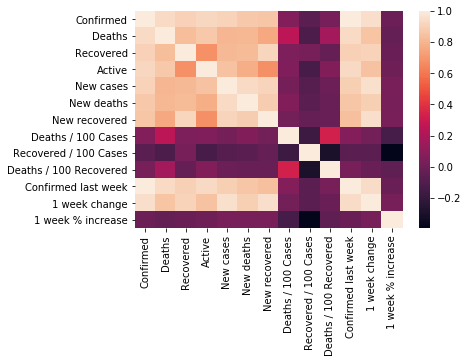

In [19]:
corr = sns.heatmap(cwl.corr())

Plusieurs choses sont à noter dans l'heatmap ci-dessus. Plus l'on tend vers 1, plus la corrélation est forte. Ainsi, on peut constater une forte corrélation entre le nombre de cas et le nombre de mort.

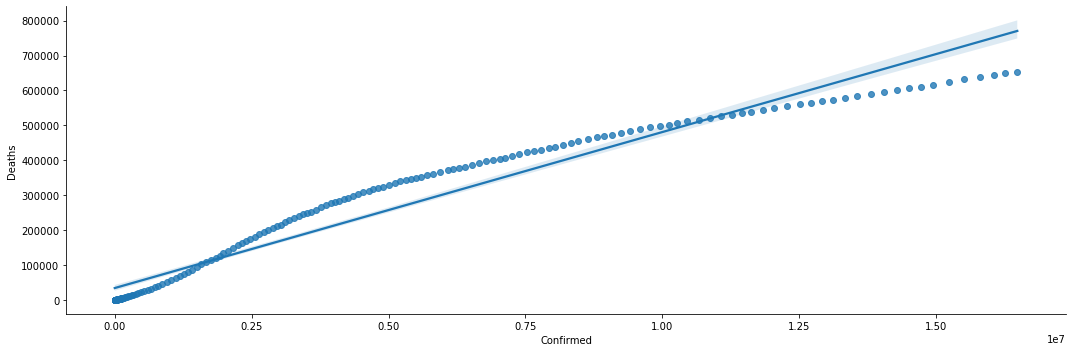

In [20]:
lm = sns.lmplot(x='Confirmed', y='Deaths', data=dw, height=5, aspect=3) #Le graphique suivant met en évidence la courbe de progression des morts en fonction du nombre de cas

On peut également voir que depuis début 2020, le nmbre de cas ne fait qu'augmenter et ceux, de plus en plus vite.

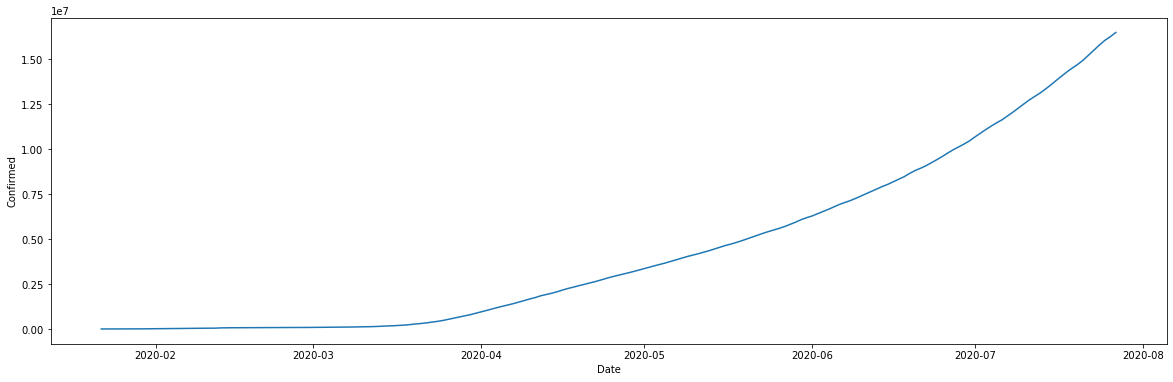

In [153]:
dw['Date'] = dw['Date'].astype('datetime64[ns]')
dw['Date'] = pd.to_datetime(dw['Date'], format='%d.%m.%Y')
sns.lineplot(x='Date', y='Confirmed', data=dw.query("(Date > '2020-01-01')"))
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

# Boite à moustache

Nous allons maintenant étudier le nombre de cas en fonction des régions du monde via la boite à moustache. Etant de donnée que celle-ci comporte beaucoup de données abérrante, nous avons du prendre un échantillon plus petit afin d'avoir une boite à moustache plus intéressante à étudier.

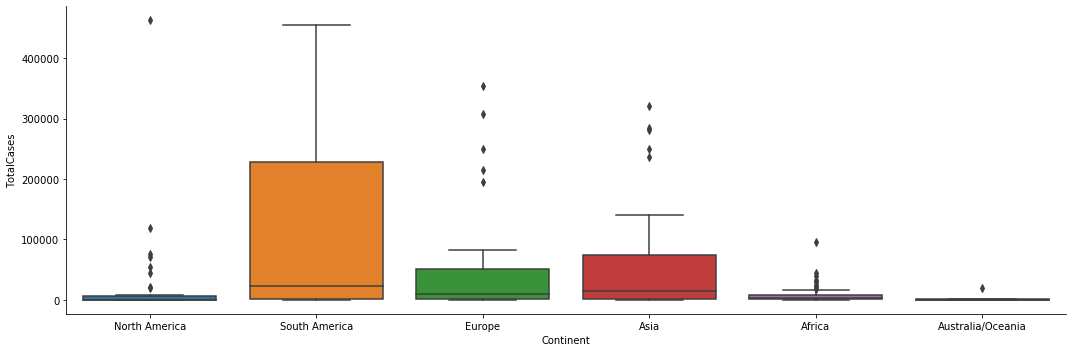

In [21]:
mask = (world['TotalCases'] < 500000)
sns.catplot(x="Continent",y="TotalCases",kind="box",data=world.loc[mask], height=5, aspect=3)

Les commentaires ci-dessous sont des tentatives d'extraction de données abbérantes par continents, mais cela modifiais et rendais le graphique illisible.

In [22]:
#fig = mp.pyplot.gcf()
#fig.set_size_inches(20,6)
#sns.catplot(x="Continent",y="TotalCases",kind="box",data=world.query("(TotalCases < 500 and Continent=='North America') or (TotalCases < 20000 and Continent=='South America') or (TotalCases < 17000 and Continent=='Europe') or (TotalCases < 2000 and Continent=='Asia') or (TotalCases < 5000 and Continent=='Africa') or (TotalCases < 400 and Continent=='Australia/Oceania')"), height=5, aspect=3)


In [23]:
#sns.catplot(x="Continent",y="TotalCases",kind="box",data=world.query("(TotalCases < 17000 and Continent=='Europe') "), height=5, aspect=3)

In [24]:
#sns.catplot(x="Continent",y="TotalCases",kind="box",data=world.query("(TotalCases < 500 and Continent=='North America') "), height=5, aspect=3)

In [25]:
#sns.catplot(x="Continent",y="TotalCases",kind="box",data=world.query("(TotalCases < 400 and Continent=='Australia/Oceania') "), height=5, aspect=3)

In [26]:
#sns.catplot(x="Continent",y="TotalCases",kind="box",data=world.query("(TotalCases < 2000 and Continent=='Asia') "), height=5, aspect=3)

In [27]:
#sns.catplot(x="Continent",y="TotalCases",kind="box",data=world.query("(TotalCases < 20000 and Continent=='South America') "), height=5, aspect=3)

## Répartion des cas dans le monde

Nous allons maintenant nous intérésser à la répartion du nombre de cas en fonction des régions.

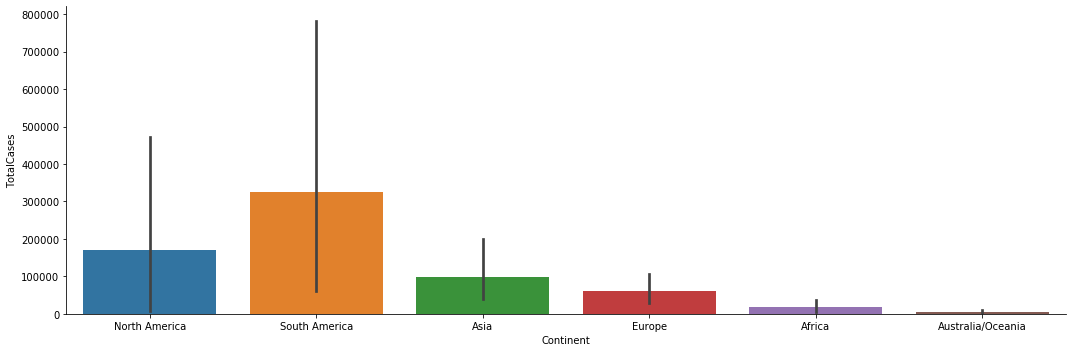

In [28]:
cat = sns.catplot(x="Continent", y='TotalCases', kind='bar',data=world, height=5, aspect=3) 
#Graphique catégorielle pour afficher le nombre de mort en fonction de la région

Comme nous pouvons voir dans le graphique ci-dessus, il y a beaucoup plus de cas en amérique que dans le reste du monde. Maintenant, nous allons nous intéresser aux nombre de pays en fonction des régions du monde. 

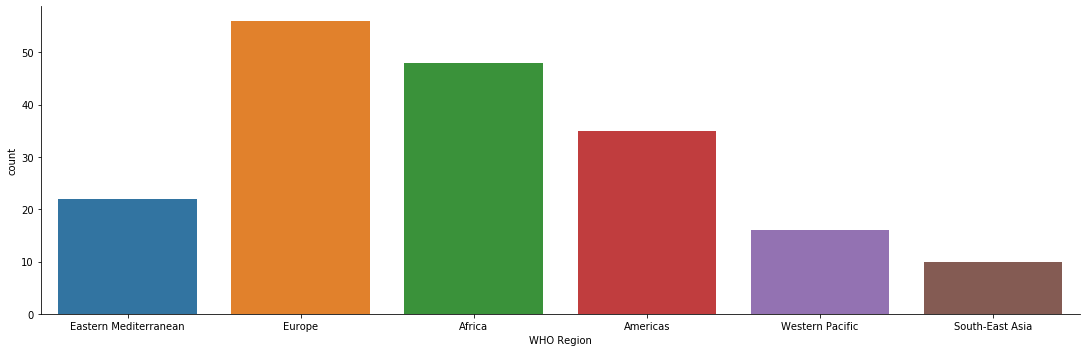

In [29]:
cat = sns.catplot(x="WHO Region", kind='count',data=cwl, height=5, aspect=3) 
#Graphique catégorielle pour afficher le nombre de pays dans chaque region

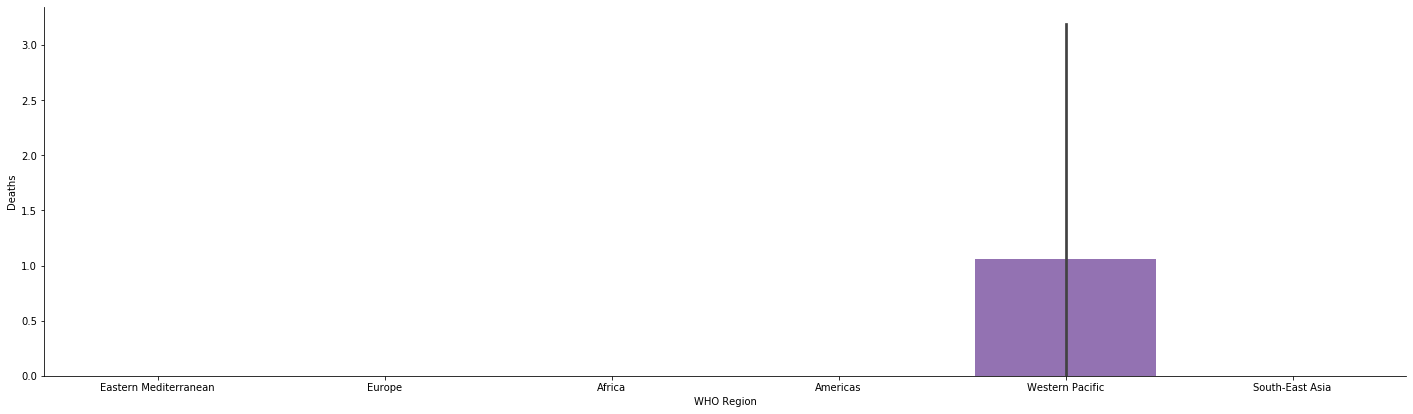

In [170]:
full['Date'] = full['Date'].astype('datetime64[ns]')
full['Date'] = pd.to_datetime(full['Date'], format='%d.%m.%Y')
cat = sns.catplot(x="WHO Region", y="Deaths", kind='bar', data=full.query("(Date == '2020-01-22')"), height=5, aspect=3) 
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

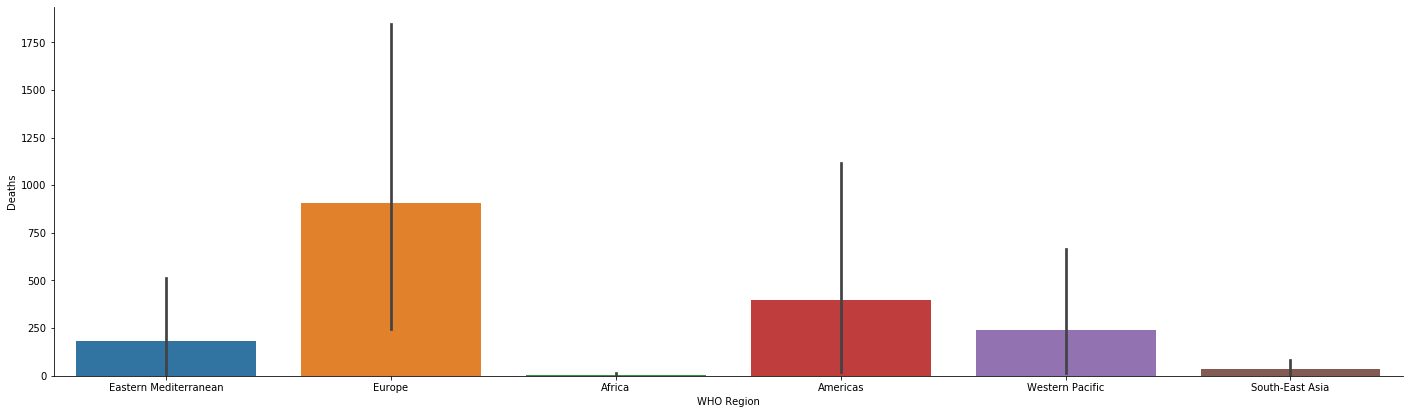

In [171]:
full['Date'] = full['Date'].astype('datetime64[ns]')
full['Date'] = pd.to_datetime(full['Date'], format='%d.%m.%Y')
cat = sns.catplot(x="WHO Region", y="Deaths", kind='bar', data=full.query("(Date == '2020-04-05')"), height=5, aspect=3) 
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

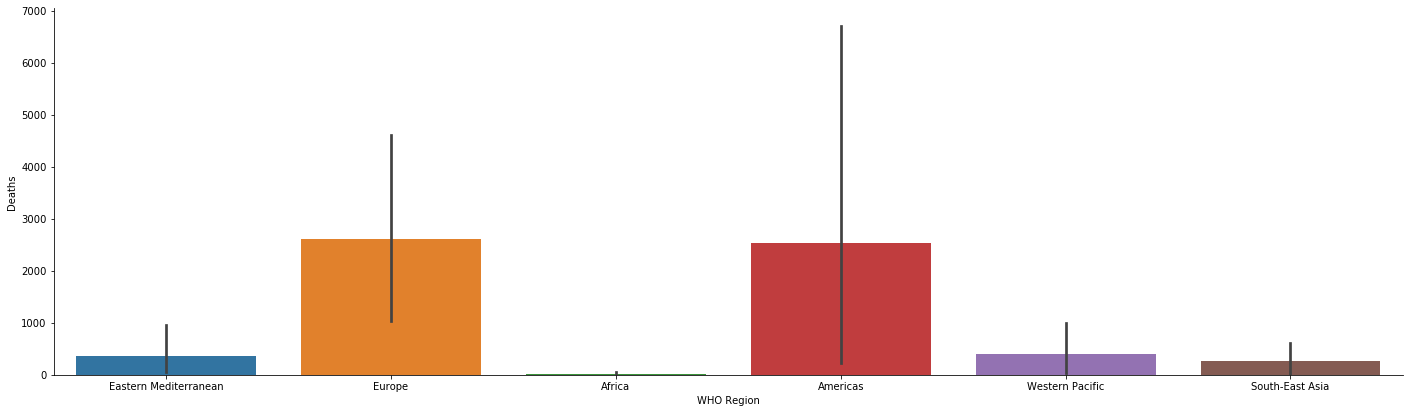

In [174]:
full['Date'] = full['Date'].astype('datetime64[ns]')
full['Date'] = pd.to_datetime(full['Date'], format='%d.%m.%Y')
cat = sns.catplot(x="WHO Region", y="Deaths", kind='bar', data=full.query("(Date == '2020-05-04')"), height=5, aspect=3) 
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

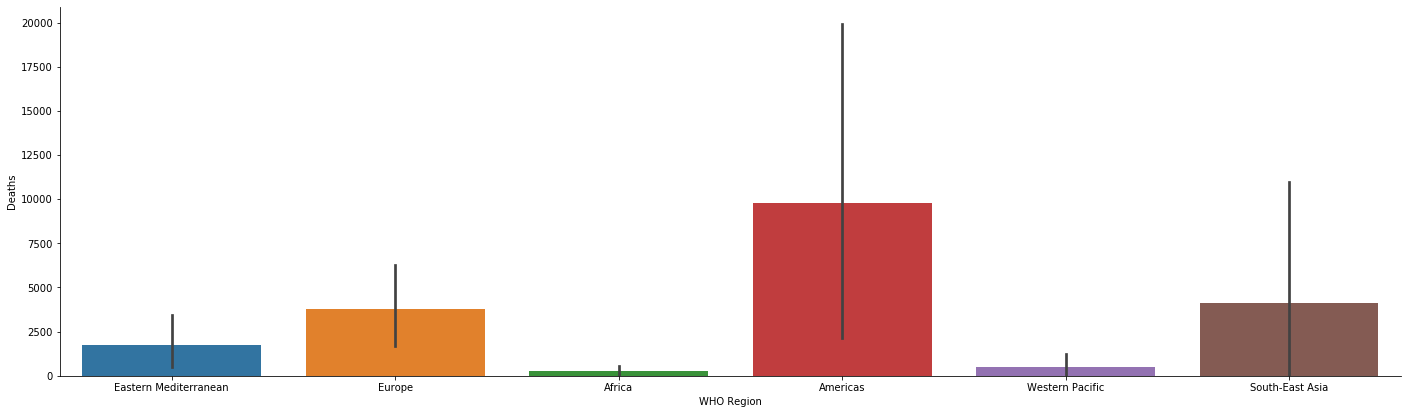

In [175]:
full['Date'] = full['Date'].astype('datetime64[ns]')
full['Date'] = pd.to_datetime(full['Date'], format='%d.%m.%Y')
cat = sns.catplot(x="WHO Region", y="Deaths", kind='bar', data=full.query("(Date == '2020-07-27')"), height=5, aspect=3) 
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

Ainsi, nous pouvons voir dans le graphique ci-dessous que plus la population est forte, plus il y a de mort.

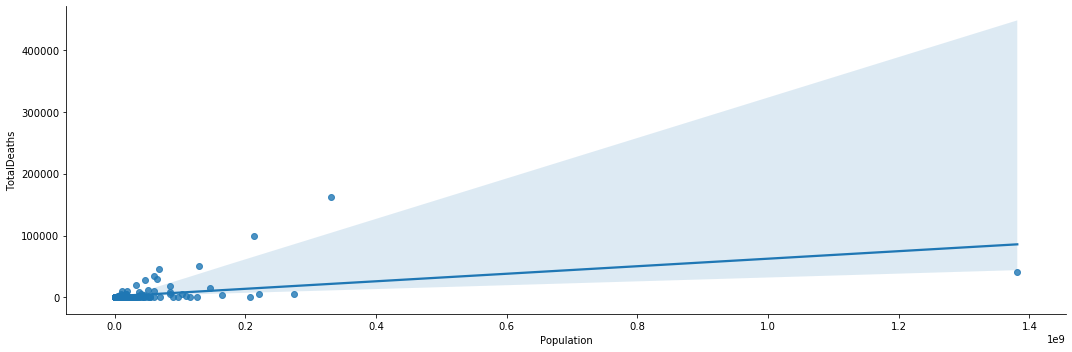

In [30]:
lmp = sns.lmplot(x='Population', y='TotalDeaths', data=world, height=5, aspect=3)

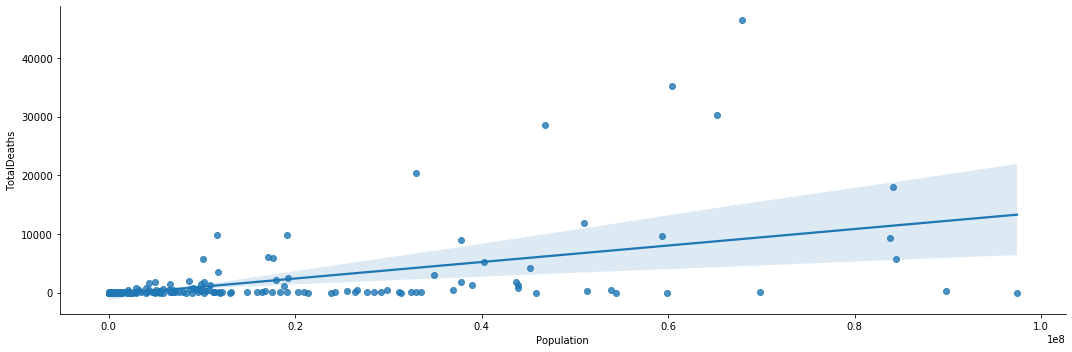

In [31]:
mask = (world['Population'] <100000000) & (world['TotalDeaths'] < 300000) #Nous prenons un échantillon plus petit afin d'avoir un graphique plus précis.
rel = sns.lmplot(x='Population', y='TotalDeaths', data=world.loc[mask], height=5, aspect=3)

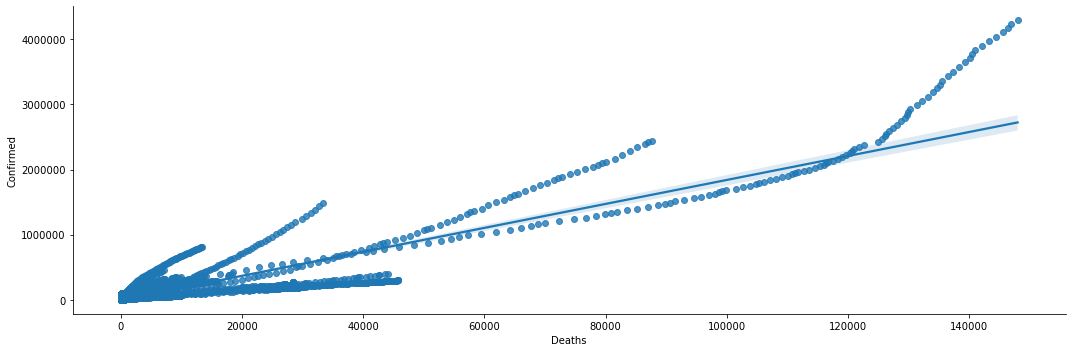

In [32]:
rel = sns.lmplot(x='Deaths', y='Confirmed', data=ccc, height=5, aspect=3)

# Tester c'est gagner

Dans cette partie nous cherchons à mettre en évidence le faite que plus il y a de tests, plus le nombre de guérrit augmente mais que pourtant, beaucoup de pays ne test toujours pas assez.

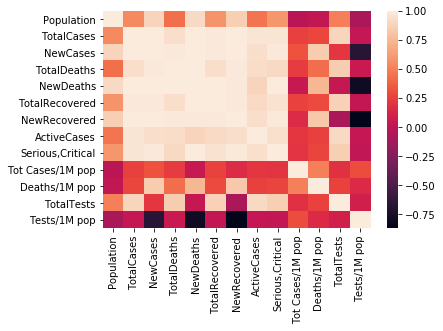

In [33]:
corr = sns.heatmap(world.corr())

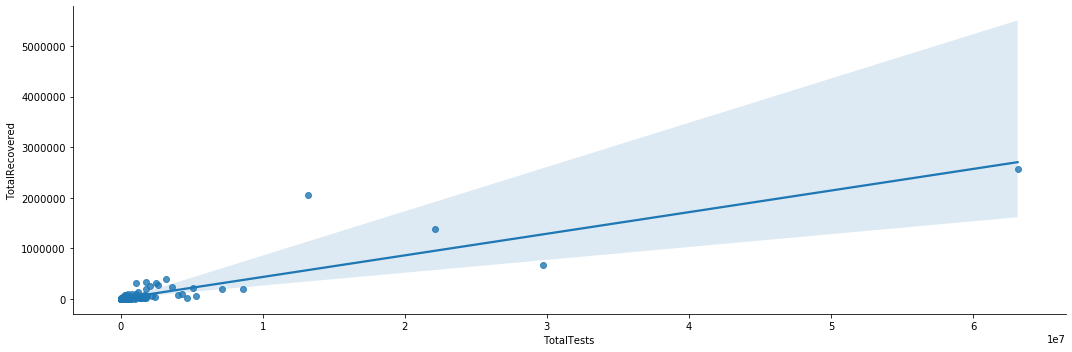

In [34]:
rel = sns.lmplot(x='TotalTests', y='TotalRecovered', data=world, height=5, aspect=3)

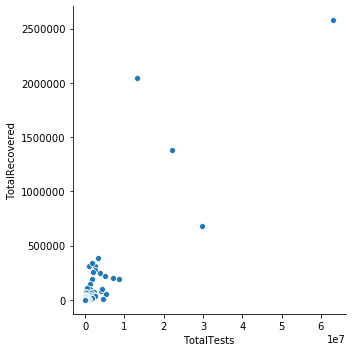

In [56]:
rel = sns.relplot(x='TotalTests', y='TotalRecovered', data=world)

# Algorithme K-means

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [97]:
X=cwl.iloc[:, [5,6]].values

In [98]:
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

In [99]:
kmeans.fit(X)

KMeans(n_clusters=10, random_state=0)

In [100]:
wcss.append(kmeans.inertia_)

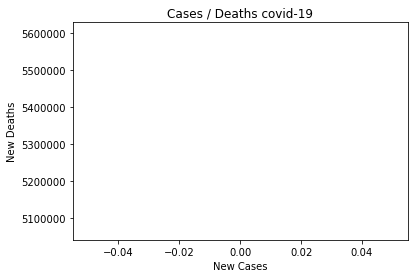

In [101]:
plt.plot(wcss)
plt.title('Cases / Deaths covid-19')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.show()

In [102]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [103]:
y_kmeans = kmeans.fit_predict(X)

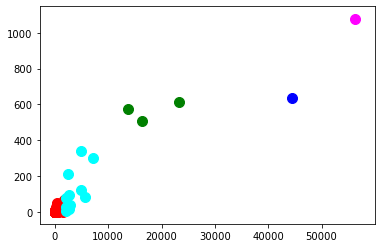

In [104]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

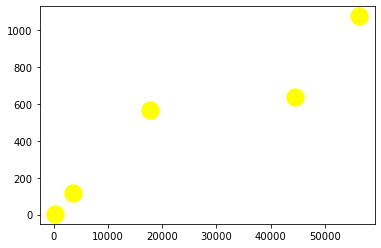

In [105]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

plt.show()

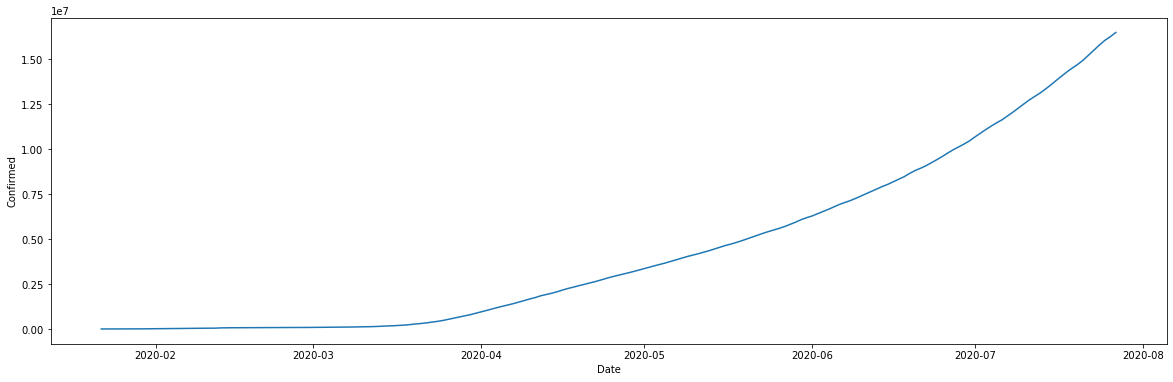